In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

deposit = pd.read_csv("Deposit (1).csv", sep=";")
deposit.head()

,Client Age,Job Status,Marital Status,Education Status,Has Credit?,Contact Type,Last Contact Month,Day of the Week,Last Contact Duration(in seconds),Subscribed deposit?
0,56,housemaid,married,basic.4y,no,telephone,may,mon,261,no
1,57,services,married,high.school,unknown,telephone,may,mon,149,no
2,37,services,married,high.school,no,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,no,telephone,may,mon,151,no
4,56,services,married,high.school,no,telephone,may,mon,307,no


In [3]:
deposit.tail()

,Client Age,Job Status,Marital Status,Education Status,Has Credit?,Contact Type,Last Contact Month,Day of the Week,Last Contact Duration(in seconds),Subscribed deposit?
41183,73,retired,married,professional.course,no,cellular,nov,fri,334,yes
41184,46,blue-collar,married,professional.course,no,cellular,nov,fri,383,no
41185,56,retired,married,university.degree,no,cellular,nov,fri,189,no
41186,44,technician,married,professional.course,no,cellular,nov,fri,442,yes
41187,74,retired,married,professional.course,no,cellular,nov,fri,239,no


In [ ]:
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Client Age                         41188 non-null  int64 
 1   Job Status                         41188 non-null  object
 2   Marital Status                     41188 non-null  object
 3   Education Status                   41188 non-null  object
 4   Has Credit?                        41188 non-null  object
 5   Contact Type                       41188 non-null  object
 6   Last Contact Month                 41188 non-null  object
 7   Day of the Week                    41188 non-null  object
 8   Last Contact Duration(in seconds)  41188 non-null  int64 
 9   Subscribed deposit?                41188 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.1+ MB


In [ ]:
deposit.columns

Index(['Client Age', 'Job Status', 'Marital Status', 'Education Status',
       'Has Credit?', 'Contact Type', 'Last Contact Month', 'Day of the Week',
       'Last Contact Duration(in seconds)', 'Subscribed deposit?'],
      dtype='object')

In [ ]:
deposit.shape

(41188, 10)

In [ ]:
display(deposit.isna().sum())

,0
Client Age,0
Job Status,0
Marital Status,0
Education Status,0
Has Credit?,0
Contact Type,0
Last Contact Month,0
Day of the Week,0
Last Contact Duration(in seconds),0
Subscribed deposit?,0


In [ ]:
missing = deposit.isnull().sum()
for col in deposit.columns:
    if deposit[col].dtype == 'object':
        missing[col] += (deposit[col].str.lower() == 'unknown').sum()
missing_pct = missing / len(deposit) * 100
missing, missing_pct

(Client Age                              0
 Job Status                            330
 Marital Status                         80
 Education Status                     1731
 Has Credit?                          8597
 Contact Type                            0
 Last Contact Month                      0
 Day of the Week                         0
 Last Contact Duration(in seconds)       0
 Subscribed deposit?                     0
 Age Group                              33
 Duration Group                          4
 dtype: int64,
 Client Age                            0.000000
 Job Status                            0.801204
 Marital Status                        0.194231
 Education Status                      4.202680
 Has Credit?                          20.872584
 Contact Type                          0.000000
 Last Contact Month                    0.000000
 Day of the Week                       0.000000
 Last Contact Duration(in seconds)     0.000000
 Subscribed deposit?                 

In [ ]:
bins = [18, 25, 35, 45, 60, np.inf]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
deposit['Age Group'] = pd.cut(deposit['Client Age'], bins=bins, labels=labels)

def credit_yes_percentage(series):
    lower_series = series.str.lower()
    yes_count = (lower_series == 'yes').sum()
    total_count = len(series)
    return (yes_count / total_count) * 100

percent_credit = deposit.groupby('Age Group')['Has Credit?'].apply(credit_yes_percentage)
max_group = percent_credit.idxmax()

percent_credit, max_group


/tmp/ipython-input-3184510687.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percent_credit = deposit.groupby('Age Group')['Has Credit?'].apply(credit_yes_percentage)


(Age Group
 18-25    0.000000
 26-35    0.006735
 36-45    0.000000
 46-60    0.018313
 60+      0.000000
 Name: Has Credit?, dtype: float64,
 '46-60')

Job Status
admin.           254.312128
blue-collar      264.542360
entrepreneur     263.267857
housemaid        250.454717
management       257.058140
retired          273.712209
self-employed    264.142153
services         258.398085
student          283.683429
technician       250.232241
unemployed       249.451677
unknown          239.675758
Name: Last Contact Duration(in seconds), dtype: float64
student


/tmp/ipython-input-1050957130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_duration.index, y=job_duration.values, palette='Blues')


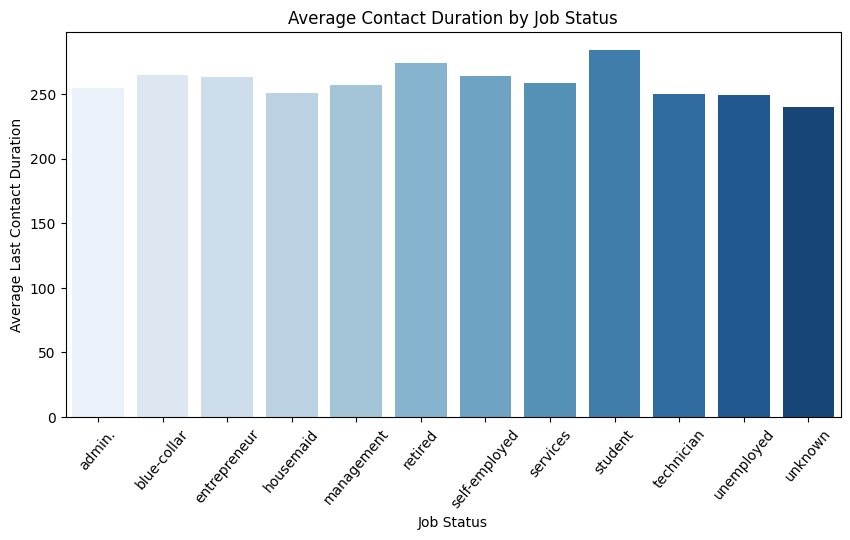

In [ ]:
import seaborn as sns
job_duration = deposit.groupby('Job Status')['Last Contact Duration(in seconds)'].mean()
print(job_duration)

job_duration_max = job_duration.idxmax()
print(job_duration_max)

plt.figure(figsize=(10, 5))
sns.barplot(x=job_duration.index, y=job_duration.values, palette='Blues')
plt.xticks(rotation=50)
plt.ylabel('Average Last Contact Duration')
plt.title('Average Contact Duration by Job Status')
plt.show()

In [ ]:
group_counts = deposit.groupby(["Marital Status","Job Status","Contact Type"]).size().sort_values(ascending=False)
group_counts.head()

Marital Status  Job Status   Contact Type
married         blue-collar  cellular        3606
                admin.       cellular        3483
                blue-collar  telephone       3081
single          admin.       cellular        2793
married         technician   cellular        2384
dtype: int64

/tmp/ipython-input-3949421427.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yes_percent = deposit.groupby("Duration Group")["Has Credit?"].apply(credit_yes)
/tmp/ipython-input-3949421427.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yes_percent.index, y=yes_percent.values, palette='cool')


Duration Group
Short     0.009977
Medium    0.010022
Long      0.000000
Name: Has Credit?, dtype: float64


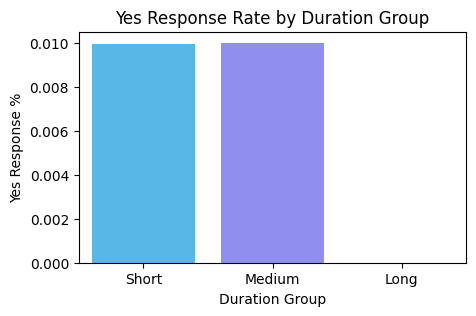

In [ ]:
bins = [0, 100, 300, np.inf]
labels = ["Short", "Medium", "Long"]

deposit["Duration Group"] = pd.cut(deposit["Last Contact Duration(in seconds)"], bins=bins, labels=labels)

def credit_yes(x):
    x = x.str.lower()
    return (x == 'yes').mean() * 100

yes_percent = deposit.groupby("Duration Group")["Has Credit?"].apply(credit_yes)

print(yes_percent)

plt.figure(figsize=(5, 3))
sns.barplot(x=yes_percent.index, y=yes_percent.values, palette='cool')
plt.ylabel('Yes Response %')
plt.title('Yes Response Rate by Duration Group')
plt.show()


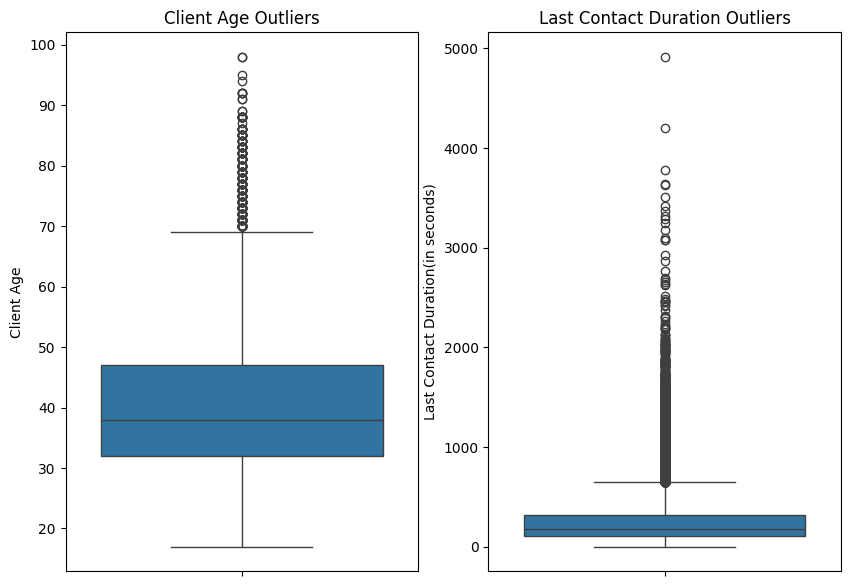

8.264543070797314


'The boxplots highlight the existence of outliers in both client age and last contact duration. Most clients fall within the age range of roughly 32 to 47 years, while a small number of clients over 70 are identified as outliers. The last contact duration varies widely, with the majority of calls lasting less than 400 seconds, but numerous extreme cases exceed 1000 seconds, indicating unusually lengthy interactions. Overall, both variables display skewed distributions with significant outliers that could influence the analysis.'

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(y=deposit['Client Age'])
plt.title('Client Age Outliers')

plt.subplot(1,2,2)
sns.boxplot(y=deposit['Last Contact Duration(in seconds)'])
plt.title('Last Contact Duration Outliers')
plt.show()

def remove_outliers(deposit, col):
    Q1 = deposit[col].quantile(0.25)
    Q3 = deposit[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return deposit[(deposit[col] >= lower) & (deposit[col] <= upper)]

deposit_clean = remove_outliers(deposit, 'Client Age')
deposit_clean = remove_outliers(deposit_clean, 'Last Contact Duration(in seconds)')

removed_percent = (1 - len(deposit_clean)/len(deposit)) * 100
print(removed_percent)

"""The boxplots highlight the existence of outliers in both client age and last contact duration. Most clients fall within
the age range of roughly 32 to 47 years, while a small number of clients over 70 are identified as outliers. The last contact
duration varies widely, with the majority of calls lasting less than 400 seconds, but numerous extreme cases exceed 1000
seconds, indicating unusually lengthy interactions. Overall, both variables display skewed distributions with significant
outliers that could influence the analysis."""

/tmp/ipython-input-307198372.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credit_status.index, y=credit_status.values, palette='Blues')


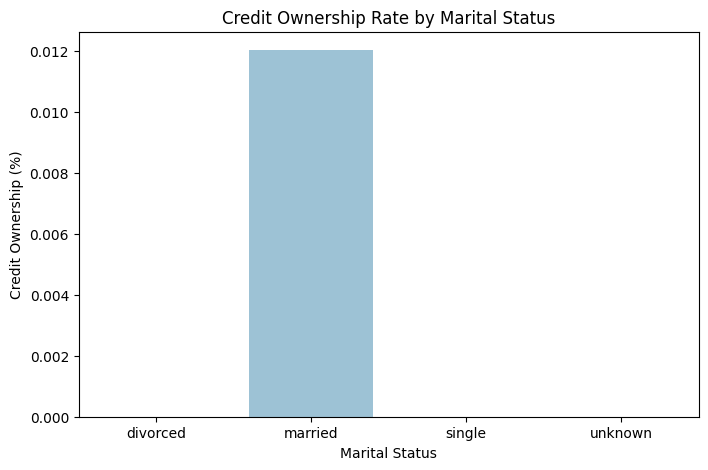

In [ ]:
credit_status = deposit.groupby("Marital Status")["Has Credit?"].apply(lambda x: x.str.lower().eq('yes').mean() * 100)

plt.figure(figsize=(8,5))
sns.barplot(x=credit_status.index, y=credit_status.values, palette='Blues')
plt.title('Credit Ownership Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Credit Ownership (%)')
plt.show()

#Based on the bar chart, only married individuals have taken a credit.

/tmp/ipython-input-4042700629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credit_status_edu.index, y=credit_status_edu.values, palette='Blues')


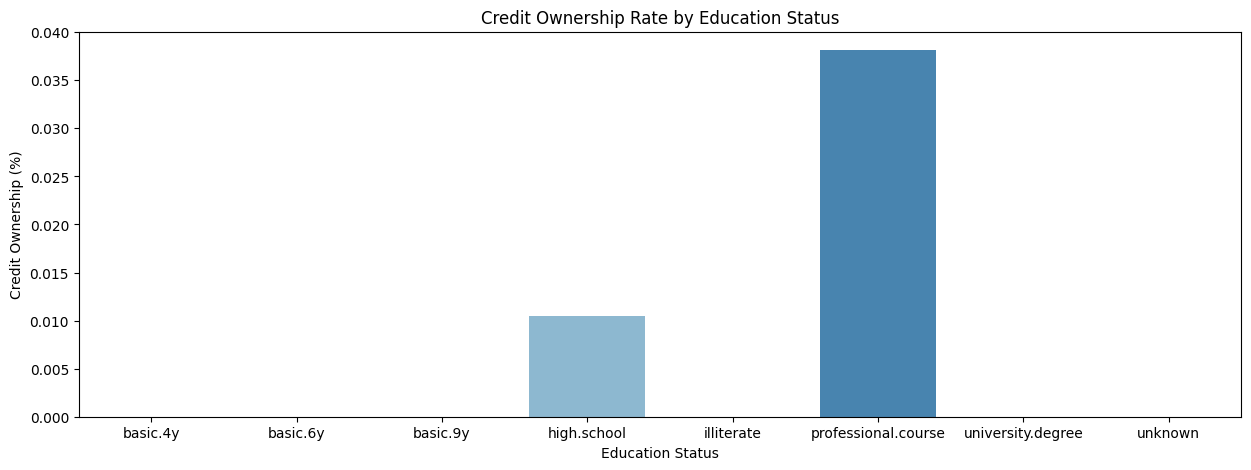

'Only individuals with a High School or Professional Course education level applied for credit, and the majority of these\napplications come from those with a Professional Course education.'

In [ ]:
credit_status_edu = deposit.groupby("Education Status")["Has Credit?"].apply(lambda x: x.str.lower().eq('yes').mean() * 100)

plt.figure(figsize=(15,5))
sns.barplot(x=credit_status_edu.index, y=credit_status_edu.values, palette='Blues')
plt.title('Credit Ownership Rate by Education Status')
plt.xlabel('Education Status')
plt.ylabel('Credit Ownership (%)')
plt.show()

"""Only individuals with a High School or Professional Course education level applied for credit, and the majority of these
applications come from those with a Professional Course education."""


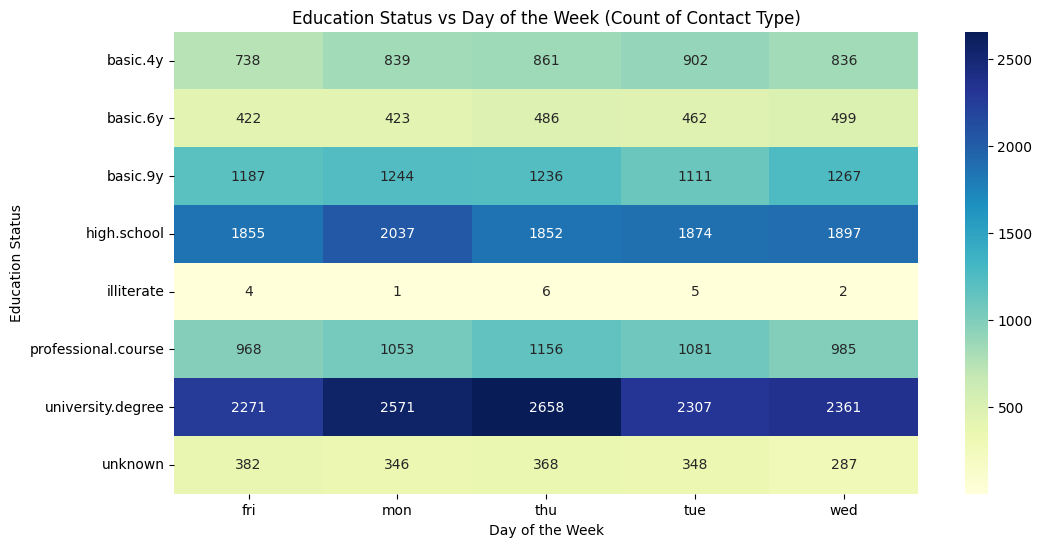

'This heatmap visualizes the count of contacts, broken down by Education Status and Day of the Week. The data clearly\nshows that individuals with a university degree were the most frequently contacted group across all days, consistently logging\ncounts well over 2,000. Conversely, the illiterate group had the fewest contacts by far throughout the week, with counts never exceeding six.'

In [ ]:
pivot_table = deposit.pivot_table(index='Education Status',columns='Day of the Week',values='Contact Type',aggfunc='count',fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Education Status vs Day of the Week (Count of Contact Type)')
plt.xlabel('Day of the Week')
plt.ylabel('Education Status')
plt.show()

"""This heatmap visualizes the count of contacts, broken down by Education Status and Day of the Week. The data clearly
shows that individuals with a university degree were the most frequently contacted group across all days, consistently logging
counts well over 2,000. Conversely, the illiterate group had the fewest contacts by far throughout the week, with counts never exceeding six."""
